In [1]:
!pip install -U nltk --quiet

# Baixando Arquivos
!gdown --id 1fyB7l_kP7aOr_LtDpQS5nZl1CFrnDNt- # IMDB
!gdown --id 1RIPUpz4Di9TB7w-w-TYIo87piYwiYj__ # Tweets
!gdown --id 1N3etsuSt-428J38HdvN8nkY88soPU6p_ # Corona Treino
!gdown --id 1DX_CiChBOmKOaoF7ct3rTkKwAP5IVMv5 # Corona Teste
!gdown --id 1saA3dgbSFwym-pNFF8hy-RTLGmGJjObO # Arquivo Auxiliar com funções

     |████████████████████████████████| 1.5 MB 4.3 MB/s 
     |████████████████████████████████| 749 kB 38.6 MB/s 
Downloading...
From: https://drive.google.com/uc?id=1fyB7l_kP7aOr_LtDpQS5nZl1CFrnDNt-
To: /content/IMDB Dataset.csv
100% 66.2M/66.2M [00:01<00:00, 46.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RIPUpz4Di9TB7w-w-TYIo87piYwiYj__
To: /content/Tweets_ptbr.csv
100% 1.85M/1.85M [00:00<00:00, 58.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N3etsuSt-428J38HdvN8nkY88soPU6p_
To: /content/Corona_NLP_train.csv
100% 10.5M/10.5M [00:00<00:00, 64.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DX_CiChBOmKOaoF7ct3rTkKwAP5IVMv5
To: /content/Corona_NLP_test.csv
100% 1.00M/1.00M [00:00<00:00, 62.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1saA3dgbSFwym-pNFF8hy-RTLGmGJjObO
To: /content/aux_lib.py
100% 2.82k/2.82k [00:00<00:00, 4.71MB/s]


In [2]:
!gdown --id 11Lxa5Cml93ofVuxUPdwTQbFeQy4RZDaQ # Negative Words
!gdown --id 1hdlLi2m32Lgw2FMltsNwix_I9LZOkEQh # Positive Words

Downloading...
From: https://drive.google.com/uc?id=11Lxa5Cml93ofVuxUPdwTQbFeQy4RZDaQ
To: /content/negative-words.csv
100% 44.8k/44.8k [00:00<00:00, 36.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hdlLi2m32Lgw2FMltsNwix_I9LZOkEQh
To: /content/positive-words.csv
100% 19.1k/19.1k [00:00<00:00, 31.0MB/s]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load, dump
from aux_lib import *

# IMDB

In [4]:
df_imdb = pd.read_csv('IMDB Dataset.csv')
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df_imdb.shape

(50000, 2)

In [6]:
df_imdb.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

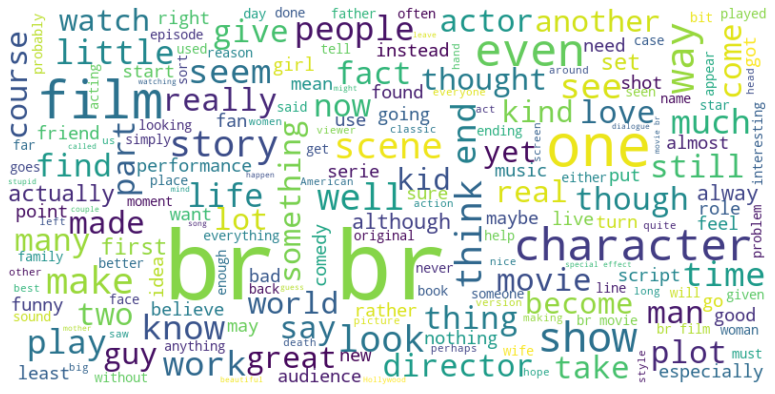

In [7]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

coluna_texto = df_imdb['review']

# Separando todos os reviews com um espaço e juntanto todas as palavras em 1 super textão
reviews = " ".join(review for review in coluna_texto)

wordcloud = WordCloud(max_font_size= 100, max_words= 200, background_color= 'white', width= 800, height= 400).generate(reviews)

# Plotando a Cloud
plt.figure(figsize=[15,7])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Iniciando o processamento...

In [8]:
%%capture
import nltk
# Fazendo o dowload dos pacotes
nltk.download('popular')

### Tokenizing + Lowercase

In [9]:
from nltk.tokenize import word_tokenize

# Transformando tudo em lowercase e criando a coluna com a tokenização
df_imdb['rev_token'] = df_imdb.review.str.lower().apply( word_tokenize )

In [10]:
df_imdb.head()

,review,sentiment,rev_token
0,One of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,"[a, wonderful, little, production, ., <, br, /..."
2,I thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,"[basically, there, 's, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, 's, ``, love, in, the, time, ..."


### Stopwords

In [11]:
from nltk.corpus import stopwords
from string import punctuation

# Colocando o punctuation em uma lista
print(list(punctuation))

# Selecionando a lista das palavras para a linguagem necessaria
stw = stopwords.words('english')
print(stw)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when

In [12]:
proprio = ['br', "'s", "``", "''"] # Adicionando palavras para remocação

# Esse conjunto é muito interessante quando se quer somar listas (concatena listas)
lista_remocao = set( stw + list(punctuation) + proprio )
print(lista_remocao)

{'him', "hadn't", '<', 'me', 'not', ',', 'itself', 'didn', "haven't", '`', 'by', "you've", 'she', 'm', 'wouldn', 'only', '&', 're', 'on', "you're", 'is', 'so', 'above', 'whom', 'most', 'between', 'does', 'her', 'into', 'will', 'been', ';', "hasn't", '>', 'during', 'couldn', 'of', 'themselves', 'those', '$', '~', 'are', 'with', "couldn't", 'each', 'these', 'you', '\\', 'it', 'did', '#', ':', 'ain', "''", '%', "she's", 'both', '(', '!', '+', "mustn't", 'very', "that'll", '/', 'don', "'s", 'because', "wasn't", 'some', 'as', 'while', 'our', 'against', 's', 'do', 'to', 'in', '|', 'now', 'my', 'ma', 'am', 'y', 'll', 'aren', ']', 'myself', 've', "you'd", 'mustn', "you'll", 'then', 'if', '-', '?', 'mightn', 'its', 'too', '*', 'this', 'and', 'your', 'br', 'more', 'shan', 'himself', '_', '}', 'yours', "mightn't", 'over', 'or', 'under', 'such', 'all', 'hasn', 'who', ')', 'had', "don't", "didn't", '``', 'off', 'doing', 'other', 'but', 'isn', 'below', 'until', 'haven', "wouldn't", 'than', 'we', 'sh

### Removing Storwords

In [13]:
df_imdb['rev_token_stw'] = df_imdb.rev_token.apply( remove_stops, stopwords_pt = lista_remocao )
df_imdb.head()

,review,sentiment,rev_token,rev_token_stw
0,One of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. <br /><br />The...,positive,"[a, wonderful, little, production, ., <, br, /...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, there, 's, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, 's, ``, love, in, the, time, ...","[petter, mattei, love, time, money, visually, ..."


### Removing Numbers

In [14]:
df_imdb['rev_token_stw_alpha'] = df_imdb.rev_token_stw.apply( no_alphas )
df_imdb.head()

,review,sentiment,rev_token,rev_token_stw,rev_token_stw_alpha
0,One of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, 1, oz, e...","[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,"[a, wonderful, little, production, ., <, br, /...","[wonderful, little, production, filming, techn...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, there, 's, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,...","[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, 's, ``, love, in, the, time, ...","[petter, mattei, love, time, money, visually, ...","[petter, mattei, love, time, money, visually, ..."


## 2nd WordCloud

In [15]:
df_imdb['rec'] = df_imdb.rev_token_stw_alpha.apply( reconstroi_frase )
df_imdb.head(3)

,review,sentiment,rev_token,rev_token_stw,rev_token_stw_alpha,rec
0,One of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, 1, oz, e...","[one, reviewers, mentioned, watching, oz, epis...",one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,"[a, wonderful, little, production, ., <, br, /...","[wonderful, little, production, filming, techn...","[wonderful, little, production, filming, techn...",wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...


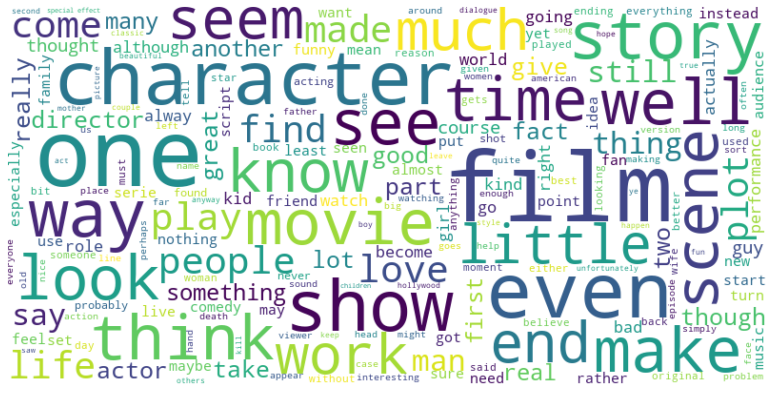

In [16]:
coluna_texto = df_imdb.rec

# Separando todos os reviews com um espaço e juntanto todas as palavras em 1 super textão
reviews = " ".join(review for review in coluna_texto)

wordcloud = WordCloud(max_font_size= 100, max_words= 200, background_color= 'white', width= 800, height= 400).generate(reviews)

# Plotando a Cloud
plt.figure(figsize=[15,7])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3rd WordCloud

In [17]:
rev_pos = df_imdb.query('sentiment == "positive"').rec
rev_neg = df_imdb.query('sentiment == "negative"').rec


rev_pos_all = " ".join(review for review in rev_pos)
rev_neg_all = " ".join(review for review in rev_neg)

wordcloud_pos = WordCloud(max_font_size= 100, max_words= 200, background_color= 'white', width= 800, height= 400).generate(rev_pos_all)
wordcloud_neg = WordCloud(max_font_size= 100, max_words= 200, background_color= 'white', width= 800, height= 400).generate(rev_neg_all)

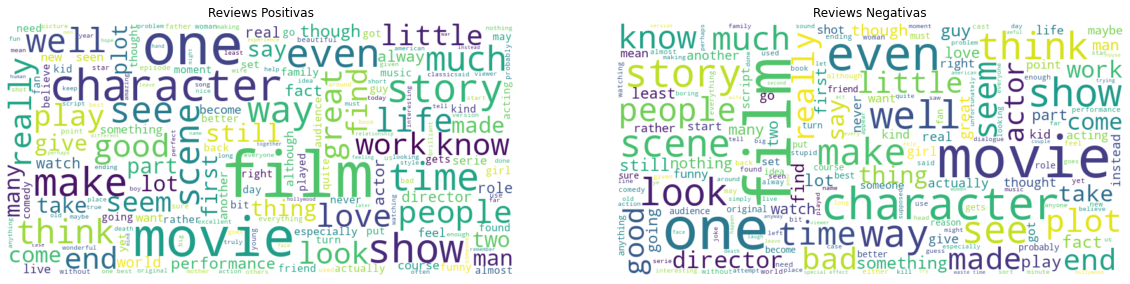

In [18]:
# Plotando as 2 nuvens

plt.figure(figsize=[20,10])
plt.subplot(1, 2, 1)
plt.xticks(())
plt.yticks(())
plt.title('Reviews Positivas')
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.xticks(())
plt.yticks(())
plt.title('Reviews Negativas')
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")

#plt.tight_layout()
plt.axis("off")
plt.show()

## Feature Extraction (1)

In [19]:
df_imdb['len_review'] = df_imdb.rec.apply(len)
df_imdb.head()

,review,sentiment,rev_token,rev_token_stw,rev_token_stw_alpha,rec,len_review
0,One of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, 1, oz, e...","[one, reviewers, mentioned, watching, oz, epis...",one reviewers mentioned watching oz episode ho...,1105
1,A wonderful little production. <br /><br />The...,positive,"[a, wonderful, little, production, ., <, br, /...","[wonderful, little, production, filming, techn...","[wonderful, little, production, filming, techn...",wonderful little production filming technique ...,619
2,I thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...,547
3,Basically there's a family where a little boy ...,negative,"[basically, there, 's, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,...","[basically, family, little, boy, jake, thinks,...",basically family little boy jake thinks zombie...,415
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, 's, ``, love, in, the, time, ...","[petter, mattei, love, time, money, visually, ...","[petter, mattei, love, time, money, visually, ...",petter mattei love time money visually stunnin...,819


In [20]:
import plotly.express as px

fig = px.box(df_imdb, y = 'len_review', color = 'sentiment')
fig.update_traces()
fig.show()

Para esse caso, o len não é uma feature relevante

## Vacabulary Analysis

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

coluna_proc = df_imdb.rec

vect = CountVectorizer( analyzer = 'word', min_df = 10 , max_df = 0.8 )
vect.fit(coluna_proc)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=None, min_df=10,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [22]:
len(vect.vocabulary_)

24939

In [23]:
m_esparsa = vect.transform(coluna_proc)
m_esparsa

<50000x24939 sparse matrix of type '<class 'numpy.int64'>'
	with 4486604 stored elements in Compressed Sparse Row format>

In [24]:
df_ms_vocab = pd.DataFrame.sparse.from_spmatrix(m_esparsa)
df_ms_vocab.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,24899,24900,24901,24902,24903,24904,24905,24906,24907,24908,24909,24910,24911,24912,24913,24914,24915,24916,24917,24918,24919,24920,24921,24922,24923,24924,24925,24926,24927,24928,24929,24930,24931,24932,24933,24934,24935,24936,24937,24938
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Invertendo as chaves e os valores do dicionario
inv_map_vocab = dict(zip(vect.vocabulary_.values() , vect.vocabulary_.keys()))

In [26]:
df_voc = df_ms_vocab.rename( columns = inv_map_vocab)
df_voc

,aa,aaa,aag,aaliyah,aames,aamir,aardman,aaron,ab,aback,abandon,abandoned,abandoning,abandonment,abandons,abba,abbas,abbey,abbot,abbott,abbreviated,abby,abc,abdomen,abduct,abducted,abduction,abe,abel,abetted,abhay,abhishek,abhorrent,abide,abiding,abigail,abilities,ability,abject,able,...,zelda,zellweger,zemeckis,zen,zenith,zentropa,zeppelin,zero,zest,zeta,zeus,zhang,zhivago,zilch,zillion,zimbalist,zimmer,zing,zip,zippy,ziyi,zizek,zodiac,zoe,zoey,zombi,zombie,zombies,zone,zones,zoo,zoom,zooming,zooms,zorro,zu,zucco,zucker,zulu,zuniga
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df_voc_imdb = df_voc.merge( df_imdb['sentiment'], left_index = True, right_index = True )
df_voc_imdb

,aa,aaa,aag,aaliyah,aames,aamir,aardman,aaron,ab,aback,abandon,abandoned,abandoning,abandonment,abandons,abba,abbas,abbey,abbot,abbott,abbreviated,abby,abc,abdomen,abduct,abducted,abduction,abe,abel,abetted,abhay,abhishek,abhorrent,abide,abiding,abigail,abilities,ability,abject,able,...,zellweger,zemeckis,zen,zenith,zentropa,zeppelin,zero,zest,zeta,zeus,zhang,zhivago,zilch,zillion,zimbalist,zimmer,zing,zip,zippy,ziyi,zizek,zodiac,zoe,zoey,zombi,zombie,zombies,zone,zones,zoo,zoom,zooming,zooms,zorro,zu,zucco,zucker,zulu,zuniga,sentiment_y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
49996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
49997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
49998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative


In [28]:
df_voc_sum = df_voc_imdb.groupby('sentiment_y').sum()
df_voc_sum

,aa,aaa,aag,aaliyah,aames,aamir,aardman,aaron,ab,aback,abandon,abandoned,abandoning,abandonment,abandons,abba,abbas,abbey,abbot,abbott,abbreviated,abby,abc,abdomen,abduct,abducted,abduction,abe,abel,abetted,abhay,abhishek,abhorrent,abide,abiding,abigail,abilities,ability,abject,able,...,zelda,zellweger,zemeckis,zen,zenith,zentropa,zeppelin,zero,zest,zeta,zeus,zhang,zhivago,zilch,zillion,zimbalist,zimmer,zing,zip,zippy,ziyi,zizek,zodiac,zoe,zoey,zombi,zombie,zombies,zone,zones,zoo,zoom,zooming,zooms,zorro,zu,zucco,zucker,zulu,zuniga
sentiment_y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
negative,9,10,22,10,1,6,6,67,7,6,36,201,9,11,19,15,5,25,9,42,8,7,71,5,6,40,21,13,11,4,0,21,16,4,12,13,108,426,16,1130,...,6,20,10,11,2,1,5,452,7,31,19,39,5,9,9,3,6,5,21,4,17,41,31,26,79,47,798,616,120,7,36,42,12,29,12,5,51,25,14,12
positive,6,5,1,17,13,38,24,108,28,13,41,173,18,18,24,11,8,37,34,60,6,26,137,5,6,14,20,23,20,20,27,3,6,8,13,25,117,466,4,1450,...,30,66,10,26,18,20,32,155,16,7,2,31,11,1,8,10,17,8,12,8,4,45,17,19,3,29,297,169,142,8,16,17,9,18,52,41,10,19,4,6


In [29]:
# Convertendo para dense (memória)
df_voc_sum = df_voc_sum.sparse.to_dense()

In [30]:
# Transpondo
df_voc_sum_t = df_voc_sum.T
df_voc_sum_t

sentiment_y,negative,positive
aa,9,6
aaa,10,5
aag,22,1
aaliyah,10,17
aames,1,13
...,...,...
zu,5,41
zucco,51,10
zucker,25,19
zulu,14,4


In [31]:
df_voc_sum_t['total'] = df_voc_sum_t.sum(axis = 'columns')
df_voc_sum_t

sentiment_y,negative,positive,total
aa,9,6,15
aaa,10,5,15
aag,22,1,23
aaliyah,10,17,27
aames,1,13,14
...,...,...,...
zu,5,41,46
zucco,51,10,61
zucker,25,19,44
zulu,14,4,18


In [32]:
# Criando uma proporção de quantas vezes cada palavra apareceu
df_voc_sum_t['prop_neg'] = df_voc_sum_t['negative'] / df_voc_sum_t['total']
df_voc_sum_t['prop_pos'] = df_voc_sum_t['positive'] / df_voc_sum_t['total']

In [33]:
df_voc_sum_t['separabilidade'] = abs(df_voc_sum_t['prop_neg'] - df_voc_sum_t['prop_pos'])
df_voc_sum_t

sentiment_y,negative,positive,total,prop_neg,prop_pos,separabilidade
aa,9,6,15,0.600000,0.400000,0.200000
aaa,10,5,15,0.666667,0.333333,0.333333
aag,22,1,23,0.956522,0.043478,0.913043
aaliyah,10,17,27,0.370370,0.629630,0.259259
aames,1,13,14,0.071429,0.928571,0.857143
...,...,...,...,...,...,...
zu,5,41,46,0.108696,0.891304,0.782609
zucco,51,10,61,0.836066,0.163934,0.672131
zucker,25,19,44,0.568182,0.431818,0.136364
zulu,14,4,18,0.777778,0.222222,0.555556


In [34]:
df_voc_sum_t['significancia'] = df_voc_sum_t['total'] / df_voc_imdb.shape[0]
df_voc_sum_t

sentiment_y,negative,positive,total,prop_neg,prop_pos,separabilidade,significancia
aa,9,6,15,0.600000,0.400000,0.200000,0.00030
aaa,10,5,15,0.666667,0.333333,0.333333,0.00030
aag,22,1,23,0.956522,0.043478,0.913043,0.00046
aaliyah,10,17,27,0.370370,0.629630,0.259259,0.00054
aames,1,13,14,0.071429,0.928571,0.857143,0.00028
...,...,...,...,...,...,...,...
zu,5,41,46,0.108696,0.891304,0.782609,0.00092
zucco,51,10,61,0.836066,0.163934,0.672131,0.00122
zucker,25,19,44,0.568182,0.431818,0.136364,0.00088
zulu,14,4,18,0.777778,0.222222,0.555556,0.00036


In [35]:
df_voc_sum_t['indice_importancia'] = df_voc_sum_t['separabilidade'] * df_voc_sum_t['significancia'] * 100
df_voc_sum_t.sort_values(by = 'indice_importancia', ascending = False)

sentiment_y,negative,positive,total,prop_neg,prop_pos,separabilidade,significancia,indice_importancia
movie,48364,36706,85070,0.568520,0.431480,0.137040,1.70140,23.316
bad,14223,3614,17837,0.797387,0.202613,0.594775,0.35674,21.218
great,5107,12811,17918,0.285021,0.714979,0.429959,0.35836,15.408
even,15205,9575,24780,0.613600,0.386400,0.227199,0.49560,11.260
like,21952,17231,39183,0.560243,0.439757,0.120486,0.78366,9.442
...,...,...,...,...,...,...,...,...
baddest,8,8,16,0.500000,0.500000,0.000000,0.00032,0.000
burner,7,7,14,0.500000,0.500000,0.000000,0.00028,0.000
impetus,7,7,14,0.500000,0.500000,0.000000,0.00028,0.000
implanted,10,10,20,0.500000,0.500000,0.000000,0.00040,0.000


In [36]:
def comparacao( data ):
  dif = abs(data.prop_pos - data.prop_neg)
  if(dif <= 0.05):
    return 'Empate'
  elif(data.prop_pos > data.prop_neg):
    return 'Positivo'
  else:
    return 'Negativo'

df_voc_sum_t['majoritario'] = df_voc_sum_t[['prop_neg', 'prop_pos']].apply( comparacao, axis = 'columns')
df_voc_sum_t.head()

sentiment_y,negative,positive,total,prop_neg,prop_pos,separabilidade,significancia,indice_importancia,majoritario
aa,9,6,15,0.600000,0.400000,0.200000,0.00030,0.006,Negativo
aaa,10,5,15,0.666667,0.333333,0.333333,0.00030,0.010,Negativo
aag,22,1,23,0.956522,0.043478,0.913043,0.00046,0.042,Negativo
aaliyah,10,17,27,0.370370,0.629630,0.259259,0.00054,0.014,Positivo
aames,1,13,14,0.071429,0.928571,0.857143,0.00028,0.024,Positivo


In [37]:
df_voc_sum_t.majoritario.value_counts()

Positivo    12987
Negativo     9224
Empate       2728
Name: majoritario, dtype: int64

In [38]:
import plotly.express as px

df = df_voc_sum_t.reset_index()
fig = px.scatter(df, x='separabilidade', y="significancia",
             size="indice_importancia", color='majoritario', hover_name='index', size_max=60,
             title='Vocabulário')
fig.show()

## Feature Extraction (2)

In [39]:
df_neg = pd.read_csv('/content/negative-words.csv', encoding = 'iso-8859-1')
df_pos = pd.read_csv('/content/positive-words.csv', encoding = 'iso-8859-1')

In [40]:
lista_neg = df_neg.negative_words.values.tolist()
lista_pos = df_pos.positive_words.values.tolist()

### Feature (Amount of positive and negative words)

In [ ]:
def qtd_palavras( frase_tokenizada, lista ):
  '''
  função que idenfica a quantidade de palavras positivas / negativas dentro de uma frase
  frase_tokenizada: qual a frase que se deseja identificar as palavras
  lista: lista com palavras positivas / negativas para comparação
  '''
  ocorrencias = 0
  for palavra in frase_tokenizada:
    if(palavra in lista):
      ocorrencias+=1
  
  return ocorrencias


df_imdb['f1_neg'] = df_imdb.rev_token_stw_alpha.apply(qtd_palavras, lista = lista_neg)
df_imdb['f1_pos'] = df_imdb.rev_token_stw_alpha.apply(qtd_palavras, lista = lista_pos)

In [ ]:
df_imdb.head()

### Feature (Amount of positive and negative words) ++importance

In [ ]:
df_custom_neg = df_voc_sum_t.query('majoritario == "Negativo"').sort_values( by = 'indice_importancia', ascending = False).\
  query('significancia > 0.02').query('separabilidade > 0.4')

df_custom_neg.head()

In [ ]:
df_custom_pos = df_voc_sum_t.query('majoritario == "Positivo"').sort_values( by = 'indice_importancia', ascending = False).\
  query('significancia > 0.02').query('separabilidade > 0.45')

df_custom_pos.head()

In [ ]:
lista_custom_neg = df_custom_neg.reset_index()['index'].values.tolist()
lista_custom_pos = df_custom_pos.reset_index()['index'].values.tolist()

In [ ]:
df_imdb['f2_neg_custom'] = df_imdb.rev_token_stw_alpha.apply(qtd_palavras, lista = lista_custom_neg)
df_imdb['f2_pos_custom'] = df_imdb.rev_token_stw_alpha.apply(qtd_palavras, lista = lista_custom_pos)
df_imdb.head()

In [ ]:
# !gdown --id 1OD6GtXHbXkFTRrzVxxIQVRDX0XaafqVl

In [ ]:
df_imdb.columns

## Criando o modelo

In [ ]:
colunas_features =['len_review', 'f1_neg', 'f1_pos', 'f2_neg_custom', 'f2_pos_custom']
X = df_imdb[colunas_features]
y = df_imdb['sentiment'].replace({'positive':1, 'negative':0})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3 , random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
X_treino = X_train.values
X_teste = X_test.values
#X_treino = X_train_norm
#X_teste = X_test_norm

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow import keras

call_es = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
call_mc = keras.callbacks.ModelCheckpoint(filepath = 'content/model.{epoch:02d}--{val_loss:.2f}.h5', save_best_only= True)

n_features = x_treino.shape[1]
Input_features = keras.Input( shape = (n_features,), name = 'Input_features' )

x = Dense(units = 24, activation = 'relu')(Input_features)
x = Dense(units = 12, activation = 'relu')(x)

out_put = Dense(1, activation = 'sigmoid', name = 'out_lstm') (x)

model = keras.Model(
    inputs = [Input_features], 
    outputs = [out_put]
)

keras.utils.plot_model(model, "model_in_out.png", show_shapes = True)

In [ ]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(
    x = X_treino,
    y = y_train,
    batch_size = 128,
    epochs = 500,
    callbacks = [call_es, call_mc],
    validation_data = (X_test, y_test)
)

In [ ]:
#n_features = x_treino.shape[1]
#Input_features = keras.Input( shape = (n_features,), name = 'Input_features' )

#x1 = Dense(units = 24, activation = 'relu')(Input_features)
#x2 = Dense(units = 24, activation = 'relu')(Input_features)

#x_concat = layers.concatenate([x1, x2])

#out_put = Dense(1, activation = 'sigmoid', name = 'out_lstm')(x_concat)

#model = keras.Model(
#    inputs = [Input_features], 
#    outputs = [out_put]
#)

#keras.utils.plot_model(model, "model_in_out.png", show_shapes = True)

In [ ]:
#model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#model.fit(
#    x = X_treino,
#    y = y_train,
#    batch_size = 128,
#    epochs = 500,
#    callbacks = [call_es, call_mc],
#    validation_data = (X_test, y_test)
#)

## W2V Embedding Words

In [ ]:
coluna_proc = df_imdb.rec

In [ ]:
from tensorflow.keras.layers import TextVectorization

# Tamanho máximo do vocabulario
vocab_size_max = 20000

sequence_length = 950

vetorizador = TextVectorization(
    max_tokens = vocab_size_max,
    output_mode = 'int',
    output_sequence_length = sequence_length
)

vetorizador.adapt(coluna_proc.values)
texto_vetorizado = vetorizador(coluna_proc.values)

In [ ]:
print(texto_vetorizado)

In [ ]:
df_vetorizado = pd.DataFrame(data = texto_vetorizado.numpy())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_vetorizado, y, test_size =0.3 , random_state = 42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow import keras

call_es = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
call_mc = keras.callbacks.ModelCheckpoint(filepath = 'content/model.{epoch:02d}--{val_loss:.2f}.h5', save_best_only= True)

embedding_size = 256 # dimensão para representar uma palavra
text_input = keras.Input(shape = (sequence_length,), name = 'reviews' )

text_feature = layers.Embedding(
    input_dim = 20000 , # Número de palavras que eu tenho
    output_dim = embedding_size, # Quantidade de colunas 
    input_length = sequence_length,
    name = 'layer_embedding',
    mask_zero = True)(text_input)

x_lstm = LSTM(units = 128, dropout = 0, )(text_feature)

out_text = layers.Dense(1, activation= 'relu', name = 'out_lstm')(x_lstm)

model = keras.Model(
    inputs = [text_input], 
    outputs = [out_text]
)

keras.utils.plot_model(model, "model_in_out.png", show_shapes = True)

In [ ]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(
    x = X_train.values,
    y = y_train,
    batch_size = 128,
    epochs = 500,
    callbacks = [call_es, call_mc],
    validation_data = (X_test.values, y_test)
)

# Tweets

In [ ]:
df_tweets = pd.read_csv('Tweets_ptbr.csv')
df_tweets.head(2)

In [ ]:
df_tweets.Classificacao.value_counts()

# Corona Virus

In [ ]:
df_corona = pd.read_csv('Corona_NLP_train.csv', encoding = 'iso-8859-1')
df_corona.head()

In [ ]:
df_corona.Sentiment.value_counts()